# Linear Regression Model

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load penguins data from Seaborn

In [2]:
df = sns.load_dataset('penguins')
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
99,Adelie,Dream,43.2,18.5,192.0,4100.0,Male
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,Female
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,Male
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,Male
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,Female
48,Adelie,Dream,36.0,17.9,190.0,3450.0,Female
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,Male


In [3]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df = df.dropna()

## Visualisation

<Figure size 1000x1000 with 0 Axes>

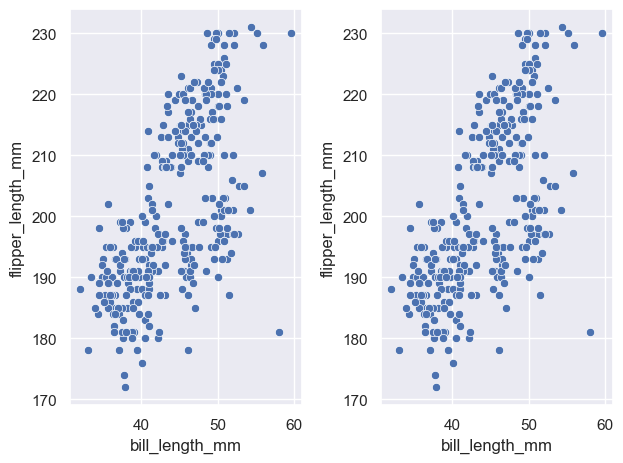

In [30]:
#statistics.linear_regression(df["bill_length_mm"], df["flipper_length_mm"])
#plt.figure(figsize=(10, 10))

#sns.set()
#fig, axs = plt.subplots(ncols=2)
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", ax=axes[0])
#plt.title('Verteilung des Alters')

#plt.subplot(1, 2, 2)
#sns.lmplot(data=df, x="bill_length_mm", y="flipper_length_mm", ax=axes[1])
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", ax=axes[1])
plt.tight_layout()
plt.show()

#fig, axs = plt.subplots(ncols=3)
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])

#plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
#sns.lmplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue = "species")
#plt.title('Scatterplot with regression line per species')

#plt.subplot(1, 2, 2)
#sns.lmplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue = "sex")

#plt.show()

## Modeling and evaluation

### 1. Features and target

In [8]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]  # features
y = df['species']  # target

### 2. Split the data into train and test (80/20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Create the Logistic Regression model

In [10]:
model = LogisticRegression()

### 4. Train the model

In [11]:
model.fit(X_train, y_train)

C:\Users\DanielBarty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 5. Make a prediction

In [12]:
y_pred = model.predict(X_test)

### 6. Check coefficient and (axis) intercept

In [108]:
print(f'coefficient: {model.coef_}')
print(f'(axis) intercept (intercept): {model.intercept_}')

coefficient: [[-8.37730545e-01  1.21781097e+00  6.90279915e-02  9.50909126e-04]
 [ 1.40537875e+00 -3.82997289e-03 -1.63052408e-01 -7.41760982e-03]
 [-5.67648201e-01 -1.21398099e+00  9.40244168e-02  6.46670069e-03]]
(axis) intercept (intercept): [ 0.02822327 -0.00954477 -0.0186785 ]


### 7. Validate the testdata: Accuracy, Confusion Matrix and Classification Report

In [109]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{ classification_report(y_test, y_pred)}')

Accuracy: 0.98507
Confusion Matrix:
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



## Get results from our model

In [110]:
checks = {
    "Adelie": pd.DataFrame({"bill_length_mm": [9.1], "bill_depth_mm": [18.7], "flipper_length_mm": [181.0], "body_mass_g": [3750.0]}),
    "Gentoo": pd.DataFrame({"bill_length_mm": [46.8], "bill_depth_mm": [14.3], "flipper_length_mm": [215.0], "body_mass_g": [4850.0]}),
    "Chinstrap": pd.DataFrame({"bill_length_mm": [49.7], "bill_depth_mm": [18.6], "flipper_length_mm": [195.0], "body_mass_g": [3600.0]})
}

for name, check in checks.items():
    prediction = model.predict(check)
    print(f"Expect: {name} prediction: ", prediction)

Expect: Adelie prediction:  ['Adelie']
Expect: Gentoo prediction:  ['Gentoo']
Expect: Chinstrap prediction:  ['Chinstrap']
